# 降維 - PCA

## 降維的意義

降維是統計中『化繁為簡』最好的體現，當你的統計對象有過多的特徵的時候，例如：語言分析的時候我們的文章變成數萬個詞欄位，一般的演算法都是派不上用場的，因為你想想，以決策樹為例

1. 要怎麼創建才能包含萬個欄位
2. 難道第一層用『喜歡』這個詞分左右，『愛』就不用管了嗎？

再或者是第二個例子，一張圖片的欄位就是他的每一個『像素』

1. 難道我們的決策樹是利用一個一個像素分左右嗎？

上面兩個例子你想一想就知道不該是這樣進行的，那怎麼辦呢？

這問題我們稱之為『維度災難』，其實解決辦法就一個，想辦法真正找出『真正維度』，又或者也可以說，將相關的特徵化簡，讓他變成少數幾個獨立的特徵，這也就是『降維』！

## 降維的時機

我在通常在幾個時機會使用降維

1. 維度過高的時候
2. 畫圖(只能2D/3D)

## 降維的方式

1. 機器學習: PCA, tSNE...等等線性/非線性的降維
2. 深度學習: 深度學習的降維效果才是真正一等一的厲害，藉由非線性的組合特徵實現更準確的降維

## PCA演算法

### 共變異數(Covariance)/相關係數(Correlation)

在學習PCA之前，首先你要先了解共變異數和相關係數的關係

![](cor.png)

![](cor2.png)

其實相關係數就只是把標準差去掉的共變異數，所以你在看待共變異數的時候可以先試著用相關係數想，會比較簡單

### 共變異數矩陣

假設我們有三個特徵

![](cor3.png)

你可以看到共變異數矩陣是一個對稱的矩陣，他的物理意義是什麼呢？我們來看一筆資料和矩陣相乘的結果！

![](cor4.png)

其實就是一個轉換，把所有特徵的對某個特徵的相關性全部灌進去，但是我們直接使用這轉換有一個問題，就是有可能兩個特徵是完全相關，這樣我們就慣了兩次

### 特徵值分解

對於一個對稱矩陣，我們一個可以把它分解成

![](cor5.png)

中間的矩陣會是一個對角矩陣，Q會是一個互相正交(垂直)的矩陣，沒錯我們只要把上面的共變異數矩陣分解了以後使用後面的Q就好了！而且因為中間有個對角化矩陣，所以我們還可以根據對角的值(特徵值)來選擇，如果我們只選五個最大的特徵值，這就是『降低成五維』了！

In [1]:
from keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (驗證圖片, 驗證答案))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


答案: 3


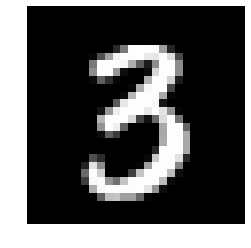

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
plt.axis("off")
print("答案:", y_train[c])
plt.imshow(x_train[c], cmap="gray")


In [4]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,40,122,254,255,254,250,159,36,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,7,80,163,242,253,253,254,233,230,253,220,73,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,121,253,253,253,245,173,91,27,141,253,253,140,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,141,253,253,152,13,0,0,12,214,253,253,140,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,10,95,46,8,0,0,0,177,253,253,209,28,0,0,0,0,0,0,0,0


In [5]:
x_shape = x_train.reshape((60000, 784))
pd.DataFrame(x_shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.decomposition import PCA
import numpy as np
embedding = PCA(n_components=30)
result = embedding.fit_transform(x_shape, y_train)
print("成分維度:", embedding.components_.shape)
print("成分維度:", embedding.components_)
print("常數:", embedding.singular_values_)
print("原本的多少:", embedding.explained_variance_ratio_)
print("原本的多少加總", np.sum(embedding.explained_variance_ratio_))
print("轉化過後的維度:", result.shape)

成分維度: (30, 784)
成分維度: [[ 6.66284109e-18 -7.56191198e-19 -5.27851191e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.75230751e-17  1.39214456e-17  4.89498525e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-3.56254025e-17 -1.03055968e-17  1.10312874e-16 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [ 2.58003474e-17  8.97348483e-18 -3.16781952e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.12740288e-18  4.91209840e-18  2.12772883e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-3.48322742e-17  2.24497786e-17 -1.97129456e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
常數: [141291.00226882 120817.18859621 112650.9232813  105291.96728785
 100077.18497144  94183.59653123  82040.11204589  77021.85990459
  75376.92118236  69631.23337981  65869.14984457  64509.13672405
  59410.04489727  58998.19503317  56985.71111788  55231.63218163
  52198.75702572  51250.98600462  49419.40913254  48694.393342
  46831.2944630

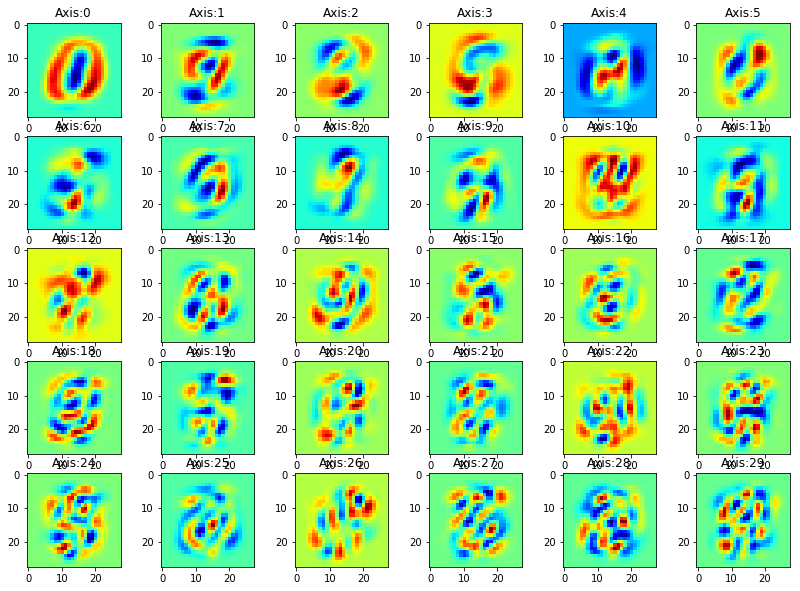

In [13]:
embedding = PCA(n_components=30)
embedding.fit_transform(x_shape, y_train)
com = embedding.components_
plt.figure(figsize=(14,10))

h = 5
w = 6
for (index, c) in enumerate(com):
    plt.subplot(h, w, index + 1)
    plt.imshow(c.reshape(28, 28), cmap="jet")
    plt.title("Axis:" + str(index))


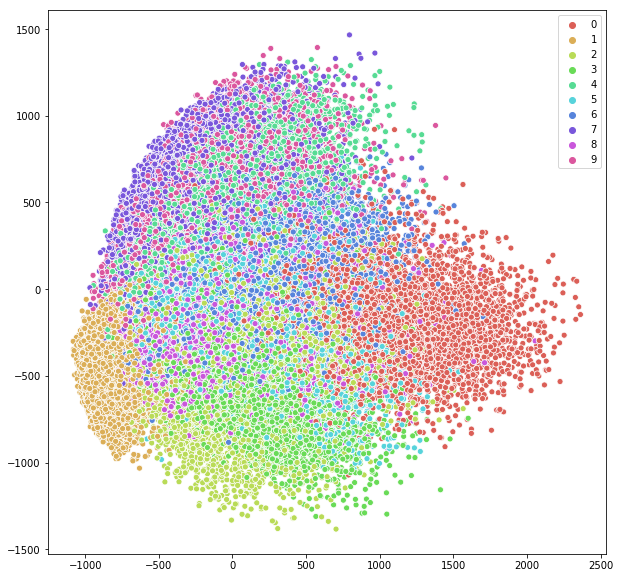

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

embedding = PCA(n_components=2)
result = embedding.fit_transform(x_shape, y_train)
plt.figure(figsize=(10, 10))
sns.scatterplot(result[:, 0], result[:, 1], 
                hue=y_train, palette=sns.color_palette("hls", 10))

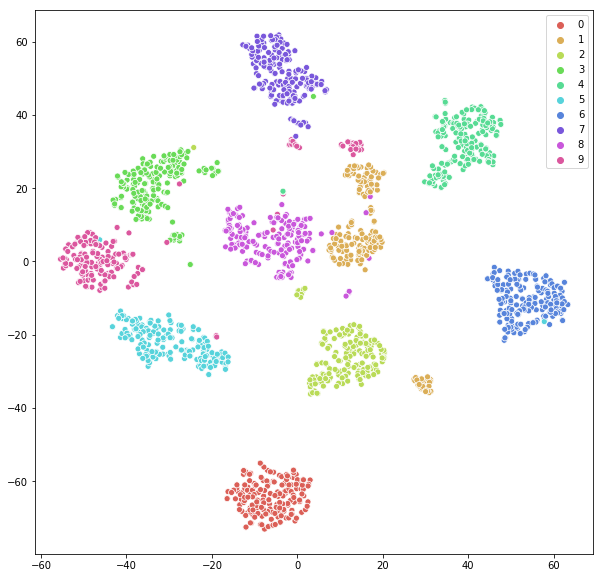

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE
digits = load_digits()
embedding = TSNE(n_components=2)
result = embedding.fit_transform(digits["data"], digits["target"])
plt.figure(figsize=(10, 10))
sns.scatterplot(result[:, 0], result[:, 1], 
                hue=digits["target"], palette=sns.color_palette("hls", 10))